### 图像的裁剪、缩放和旋转

在机器视觉领域，经常会遇到需要对图像整体的尺寸和角度进行变换。

这些内容涉及到图像的裁剪、缩放和旋转。

#### 裁剪

图像的裁剪，是指将图像的某个区域切割出来。

一些常见的应用场景包括：
    
    * 感兴趣区域提取
    * 去除无用信息
    * 图像增强
    * 纠偏：去除不规则部分，将图像变得更加整齐

事实上，图像裁剪的裁剪通常就是一个numpy矩阵切片的过程。

其中的关键内容在于，获取目标区域的坐标

例如，给定一个$512\times 512$的lena图像，想要裁剪出以原图中心点为中心的，$320\times 320$的图像，代码如下所示

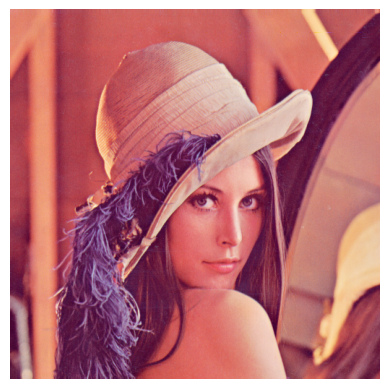

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./dataset/lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

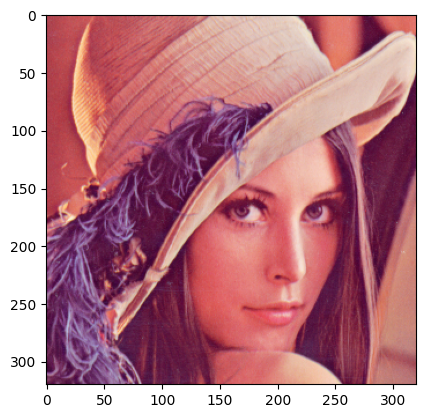

In [12]:
h, w = img.shape[:2]
cropped_img = img[h // 2 - 160: h // 2 + 160, w // 2 - 160: w // 2 + 160, :]
plt.imshow(cropped_img)
plt.show()

此外，一些第三方库也支持对图像的裁剪。

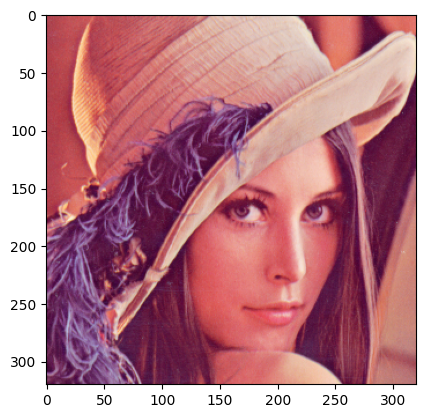

In [14]:
from PIL import Image

img = Image.open('./dataset/lena.png')
cropped_img = img.crop((512 // 2 - 320 // 2, 512 // 2 - 320 // 2,  # 左上角坐标
                        512 // 2 + 320 // 2, 512 // 2 + 320 // 2)) # 右下角坐标
plt.imshow(cropped_img)
plt.show()

#### 缩放

缩放是图像处理中常见的处理操作。

一个简单的缩放示例如下所示

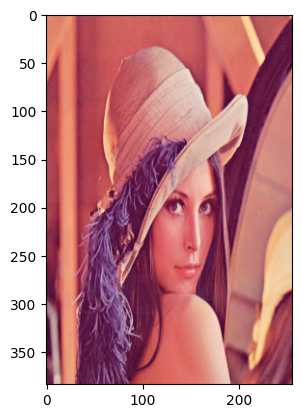

In [24]:
img = cv2.imread('./dataset/lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resized_img_1 = cv2.resize(img, dsize=(256, 384), interpolation=cv2.INTER_AREA)

plt.imshow(resized_img_1)
plt.show()

在resize函数的参数中，第一个参数为待缩放图片，第二个参数为缩放后的尺寸。

第三个参数为插值方法，共包括：
* cv2.INTER_NEAREST：最近邻插值。
* cv2.INTER_LINEAR：双线性插值。
* cv2.INTER_CUBIC：双立方插值。
* cv2.INTER_AREA：区域插值。
* cv2.INTER_LANCZOS4：Lanczos插值

以上插值方法特点不同，下面展示其中区别

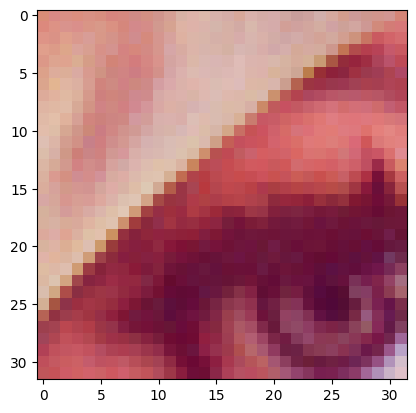

In [42]:
target_img = img[240: 272, 240: 272, :]
plt.imshow(target_img)
plt.show()

In [43]:
nearest = cv2.resize(target_img, (768, 768), interpolation=cv2.INTER_NEAREST)
linear = cv2.resize(target_img, (768, 768), interpolation=cv2.INTER_LINEAR)
cubic = cv2.resize(target_img, (768, 768), interpolation=cv2.INTER_CUBIC)
area = cv2.resize(target_img, (768, 768), interpolation=cv2.INTER_AREA)
lanczos = cv2.resize(target_img, (768, 768), interpolation=cv2.INTER_LANCZOS4)

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


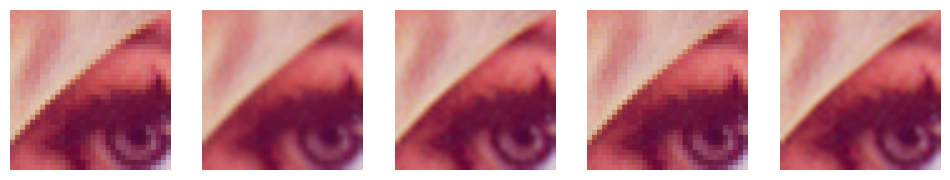

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,12))

print(ax)

ax[0].imshow(nearest)
ax[1].imshow(linear)
ax[2].imshow(cubic)
ax[3].imshow(area)
ax[4].imshow(lanczos)

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')

plt.show()

* 最近邻插值： 源图像中距离新像素位置最近的像素赋值给新像素。
    * 例如，图像缩放了fx和fy倍，那么新图像中的像素坐标$x', y'$对应原图坐标为$f_xx, f_yy$
    * 优点：速度快
    * 缺点：未考虑周围像素，锯齿严重
* 双线性插值：从周围四个像素共同加权计算像素值，距离越近权重越大，距离越远权重越小
    * 优点：平滑
    * 速度慢
* 双立方插值：新图像的每个点，都参考了周围16个点的信息
    * 两个基本步骤：
        - 计算周围16个点的像素值
        - 拟合函数计算最终像素值
    * 优点：保留图像细节信息
    * 缺点：计算量大，耗时长
* 区域重采样：按区域计算新像素
    * 每个像素都选取一个固定大小的区域
    * 每个区域通过一定算法计算一个新的像素值
    * 优点：保真，不易出现伪影
* lanczos：造了一个核函数，计算新像素
    * 优点：更加平滑的采样结果
    * 缺点：计算成本高
    
$$L(x)=\begin{cases} \frac{\sin(\pi x)}{\pi x}, & |x|<a \\
        0, & |x|\geq a \end{cases}$$

其中，a为核半径，在目标像素的a范围内，通过公式计算新的像素值。



通常来说，大部分场景都会采用双线性插值算法。（效率+效果）